# Video Classifier Using CNN and RNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [2]:
import os
path="/content/drive/MyDrive/MotionClassify"
os.chdir(path)
os.listdir(path)

['Dataset',
 'Video-Classifier-Using-CNN-and-RNN-main',
 'tmp',
 'train.csv',
 'test.csv']

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('Dataset/MotionDataset/train')

label_types = os.listdir('Dataset/MotionDataset/train')
print (label_types)

['hands flapping', 'arms shaking']


# Preparing Training Data

In [4]:
rooms = []

for item in dataset_path:
 # Get all the file names
 all_rooms = os.listdir('Dataset/MotionDataset/train' + '/' +item)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('Dataset/MotionDataset/train' + '/' +item) + '/' + room))

# Build a dataframe
train_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(train_df.head())
print(train_df.tail())


              tag                                         video_name
0  hands flapping  Dataset/MotionDataset/train/hands flapping/Han...
1  hands flapping  Dataset/MotionDataset/train/hands flapping/Han...
2  hands flapping  Dataset/MotionDataset/train/hands flapping/Han...
3  hands flapping  Dataset/MotionDataset/train/hands flapping/Han...
4  hands flapping  Dataset/MotionDataset/train/hands flapping/Han...
             tag                                         video_name
22  arms shaking  Dataset/MotionDataset/train/arms shaking/ArmsS...
23  arms shaking  Dataset/MotionDataset/train/arms shaking/ArmsS...
24  arms shaking  Dataset/MotionDataset/train/arms shaking/ArmsS...
25  arms shaking  Dataset/MotionDataset/train/arms shaking/ArmsS...
26  arms shaking  Dataset/MotionDataset/train/arms shaking/ArmsS...


In [5]:
df = train_df.loc[:,['video_name','tag']]
df
df.to_csv('train.csv')

# Preparing Test Data

In [6]:
dataset_path = os.listdir('Dataset/MotionDataset/test')
print(dataset_path)

room_types = os.listdir('Dataset/MotionDataset/test')
print("Types of activities found: ", len(dataset_path))

rooms = []

for item in dataset_path:
 # Get all the file names
 all_rooms = os.listdir('Dataset/MotionDataset/test' + '/' +item)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('Dataset/MotionDataset/test' + '/' +item) + '/' + room))

# Build a dataframe
test_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(test_df.head())
print(test_df.tail())

df = test_df.loc[:,['video_name','tag']]
df
df.to_csv('test.csv')

['arms shaking', 'hands flapping']
Types of activities found:  2
            tag                                         video_name
0  arms shaking  Dataset/MotionDataset/test/arms shaking/ArmsSh...
1  arms shaking  Dataset/MotionDataset/test/arms shaking/ArmsSh...
2  arms shaking  Dataset/MotionDataset/test/arms shaking/ArmsSh...
3  arms shaking  Dataset/MotionDataset/test/arms shaking/ArmsSh...
4  arms shaking  Dataset/MotionDataset/test/arms shaking/ArmsSh...
              tag                                         video_name
3    arms shaking  Dataset/MotionDataset/test/arms shaking/ArmsSh...
4    arms shaking  Dataset/MotionDataset/test/arms shaking/ArmsSh...
5  hands flapping  Dataset/MotionDataset/test/hands flapping/Hand...
6  hands flapping  Dataset/MotionDataset/test/hands flapping/Hand...
7  hands flapping  Dataset/MotionDataset/test/hands flapping/Hand...


In [7]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-0fpk2y7v
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-0fpk2y7v
  Resolved https://github.com/tensorflow/docs to commit ad55dbd374f3d48c2260f2a8a41da4b2c171cb32
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.1.11.719-py3-none-any.whl size=181231 sha256=da4ac289b1f2fb5eb63c0785d37f1347daf6acd4db1bd794f2504b87145ada10
  Stored in directory: /tmp/pip-ephem-wheel-cache-ihiyhrsi/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [8]:
from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
  except RuntimeError as e:
    print(e)

# Reading Prepared Data

In [10]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(f"Total videos for training: {len(train_df)}")
print(f"Total videos for testing: {len(test_df)}")


train_df.sample(10)

Total videos for training: 27
Total videos for testing: 8


,Unnamed: 0,video_name,tag
21,21,Dataset/MotionDataset/train/arms shaking/ArmsS...,arms shaking
14,14,Dataset/MotionDataset/train/arms shaking/ArmsS...,arms shaking
25,25,Dataset/MotionDataset/train/arms shaking/ArmsS...,arms shaking
1,1,Dataset/MotionDataset/train/hands flapping/Han...,hands flapping
18,18,Dataset/MotionDataset/train/arms shaking/ArmsS...,arms shaking
5,5,Dataset/MotionDataset/train/hands flapping/Han...,hands flapping
24,24,Dataset/MotionDataset/train/arms shaking/ArmsS...,arms shaking
15,15,Dataset/MotionDataset/train/arms shaking/ArmsS...,arms shaking
20,20,Dataset/MotionDataset/train/arms shaking/ArmsS...,arms shaking
4,4,Dataset/MotionDataset/train/hands flapping/Han...,hands flapping


# Feed the videos to a network:


In [11]:
IMG_SIZE = 224


def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    plt.show(frames)
    return np.array(frames)

   ### Feature Extraction

In [13]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from keras.models import Model

def build_feature_extractor(IMG_SIZE=224):
     base_model = InceptionV3(
         weights="imagenet",
         include_top=False,
         input_shape=(IMG_SIZE, IMG_SIZE, 3),
         pooling='avg' # Add global average pooling layer
     )

     # Freeze all layers of the InceptionV3 model
     for layer in base_model.layers:
         layer.trainable = False

     # Preprocess input
     inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
     # Use InceptionV3 as feature extractor
     features = base_model(inputs, training=False)

     # Build model
     model = Model(inputs=inputs, outputs=features)

     return model

#Create feature extraction model
feature_extractor_model = build_feature_extractor()


### Label Encoding
StringLookup layer encode the class labels as integers.

In [14]:
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique(train_df["tag"]))
print(label_processor.get_vocabulary())

labels = train_df["tag"].values
labels = label_processor(labels[..., None]).numpy()
labels

['arms shaking', 'hands flapping']


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

Finally, we can put all the pieces together to create our data processing utility.

In [15]:
#Define hyperparameters

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50

MAX_SEQ_LENGTH = 200
NUM_FEATURES = 2048

In [16]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()

    ##take all classlabels from train_df column named 'tag' and store in labels
    labels = df["tag"].values

    #convert classlabels to label encoding
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 145,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #145,20,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


train_data, train_labels = prepare_all_videos(train_df, "train")
test_data, test_labels = prepare_all_videos(test_df, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")



print(f"train_labels in train set: {train_labels.shape}")

print(f"test_labels in train set: {test_labels.shape}")

# MAX_SEQ_LENGTH = 20, NUM_FEATURES = 2048. We have defined this above under hyper parameters

Frame features in train set: (27, 200, 2048)
Frame masks in train set: (27, 200)
train_labels in train set: (27, 1)
test_labels in train set: (8, 1)


# Sequence Models Comparation - LSTM & RNN & GRU

In [17]:
!pip install matplotlib

In [18]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.8700 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 0.86303, saving model to ./tmp/video_classifier
1/1 [==============================] - 29s 29s/step - loss: 0.8700 - accuracy: 0.5000 - val_loss: 0.8630 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.8630 - accuracy: 0.5000
Epoch 2: val_loss improved from 0.86303 to 0.85629, saving model to ./tmp/video_classifier
1/1 [==============================] - 1s 931ms/step - loss: 0.8630 - accuracy: 0.5000 - val_loss: 0.8563 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.8562 - accuracy: 0.5000
Epoch 3: val_loss improved from 0.85629 to 0.84903, saving model to ./tmp/video_classifier
1/1 [==============================] - 1s 973ms/step - loss: 0.8562 - accuracy: 0.5000 - val_loss: 0.8490 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - ETA: 0s - l

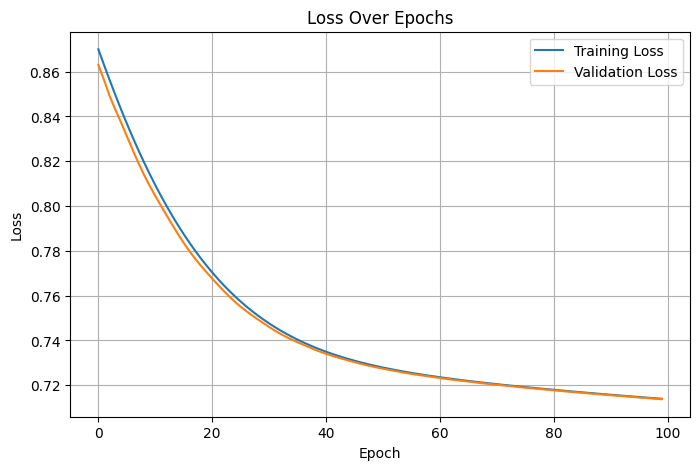

In [19]:
# LSTM
# Utility for our sequence model.
from keras import regularizers
from tensorflow.keras.optimizers import Adam

# Define customized learning rates
custom_learning_rate = 0.001

# Creating an Optimizer Instance
adam_optimizer = Adam(learning_rate=custom_learning_rate)

# Use this optimizer instance when compiling the model


def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    # Add L2 regularization
    regularizer = regularizers.l2(0.001)

    # Use `mask` and add regularization to the RNN layer
    x = keras.layers.LSTM(16, return_sequences=True,
                               kernel_regularizer=regularizer,
                               recurrent_regularizer=regularizer)(frame_features_input, mask=mask_input)
    x = keras.layers.LSTM(8,
                               kernel_regularizer=regularizer,
                               recurrent_regularizer=regularizer)(x)
    x = keras.layers.Dropout(0.4)(x)
    x = keras.layers.Dense(8, activation="relu", kernel_regularizer=regularizer)(x)
    output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = keras.Model([frame_features_input, mask_input], output)

    rnn_model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"]
    )
    return rnn_model

EPOCHS = 100
# Utility for running experiments.
def run_experiment():
    filepath = "./tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [train_data[0], train_data[1]],
        train_labels,
        validation_split=0.3,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )

    seq_model.load_weights(filepath)
    _, accuracy = seq_model.evaluate([test_data[0], test_data[1]], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model

history, sequence_model = run_experiment()
plot_loss(history)



Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 0.8403 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 0.83498, saving model to ./tmp/video_classifier
1/1 [==============================] - 12s 12s/step - loss: 0.8403 - accuracy: 0.5000 - val_loss: 0.8350 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 0.8350 - accuracy: 0.5000
Epoch 2: val_loss improved from 0.83498 to 0.82963, saving model to ./tmp/video_classifier
1/1 [==============================] - 1s 949ms/step - loss: 0.8350 - accuracy: 0.5000 - val_loss: 0.8296 - val_accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 0.8297 - accuracy: 0.5000
Epoch 3: val_loss improved from 0.82963 to 0.82515, saving model to ./tmp/video_classifier
1/1 [==============================] - 1s 943ms/step - loss: 0.8297 - accuracy: 0.5000 - val_loss: 0.8251 - val_accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - ETA: 0s - l

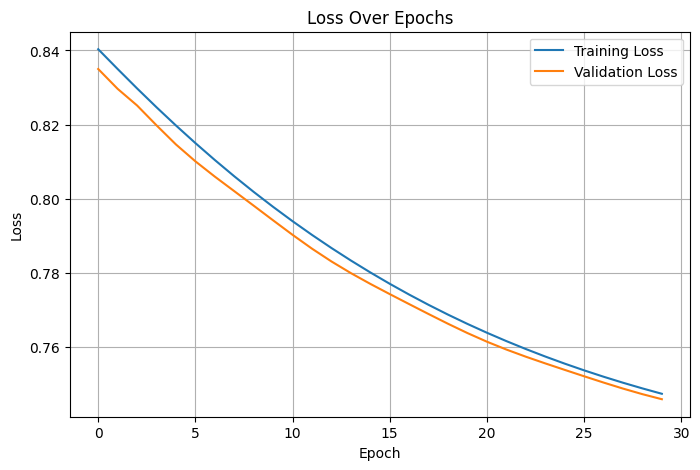

In [20]:
# GRU
# Utility for our sequence model.
from keras import regularizers
from tensorflow.keras.optimizers import Adam

# Define customized learning rates
custom_learning_rate = 0.001

# Creating an Optimizer Instance
adam_optimizer = Adam(learning_rate=custom_learning_rate)

# Use this optimizer instance when compiling the model


def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    # Add L2 regularization
    regularizer = regularizers.l2(0.001)

    # Use `mask` and add regularization to the RNN layer
    x = keras.layers.GRU(16, return_sequences=True,
                               kernel_regularizer=regularizer,
                               recurrent_regularizer=regularizer)(frame_features_input, mask=mask_input)
    x = keras.layers.GRU(8,
                               kernel_regularizer=regularizer,
                               recurrent_regularizer=regularizer)(x)
    x = keras.layers.Dropout(0.4)(x)
    x = keras.layers.Dense(8, activation="relu", kernel_regularizer=regularizer)(x)
    output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = keras.Model([frame_features_input, mask_input], output)

    rnn_model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"]
    )
    return rnn_model

EPOCHS = 30
# Utility for running experiments.
def run_experiment():
    filepath = "./tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [train_data[0], train_data[1]],
        train_labels,
        validation_split=0.3,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )

    seq_model.load_weights(filepath)
    _, accuracy = seq_model.evaluate([test_data[0], test_data[1]], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model

history, sequence_model = run_experiment()
plot_loss(history)


Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 0.7672 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 0.76528, saving model to ./tmp/video_classifier
1/1 [==============================] - 8s 8s/step - loss: 0.7672 - accuracy: 0.5000 - val_loss: 0.7653 - val_accuracy: 1.0000
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 0.7653 - accuracy: 0.5000
Epoch 2: val_loss improved from 0.76528 to 0.76341, saving model to ./tmp/video_classifier
1/1 [==============================] - 0s 347ms/step - loss: 0.7653 - accuracy: 0.5000 - val_loss: 0.7634 - val_accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 0.7634 - accuracy: 0.5000
Epoch 3: val_loss improved from 0.76341 to 0.76153, saving model to ./tmp/video_classifier
1/1 [==============================] - 0s 368ms/step - loss: 0.7634 - accuracy: 0.5000 - val_loss: 0.7615 - val_accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 0

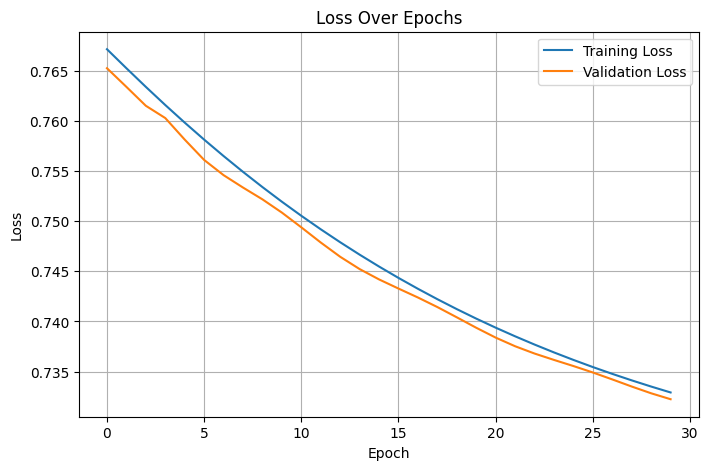

In [ ]:
# RNN
# Utility for our sequence model.
from keras import regularizers
from tensorflow.keras.optimizers import Adam

# Define customized learning rates
custom_learning_rate = 0.001

# Creating an Optimizer Instance
adam_optimizer = Adam(learning_rate=custom_learning_rate)

# Use this optimizer instance when compiling the model


def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    # Add L2 regularization
    regularizer = regularizers.l2(0.001)

    # Use `mask` and add regularization to the RNN layer
    x = keras.layers.SimpleRNN(16, return_sequences=True,
                               kernel_regularizer=regularizer,
                               recurrent_regularizer=regularizer)(frame_features_input, mask=mask_input)
    x = keras.layers.SimpleRNN(8,
                               kernel_regularizer=regularizer,
                               recurrent_regularizer=regularizer)(x)
    x = keras.layers.Dropout(0.4)(x)
    x = keras.layers.Dense(8, activation="relu", kernel_regularizer=regularizer)(x)
    output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = keras.Model([frame_features_input, mask_input], output)

    rnn_model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"]
    )
    return rnn_model

EPOCHS = 30
# Utility for running experiments.
def run_experiment():
    filepath = "./tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [train_data[0], train_data[1]],
        train_labels,
        validation_split=0.3,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )

    seq_model.load_weights(filepath)
    _, accuracy = seq_model.evaluate([test_data[0], test_data[1]], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model

history, sequence_model = run_experiment()
plot_loss(history)


